In [1]:
#pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

# IMPORT DATASET

In [3]:
raw= pd.read_csv('Zomato_Mumbai_Dataset.csv',delimiter='|')

In [4]:
raw

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15081 entries, 0 to 15080
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   NAME             15081 non-null  object
 1   PRICE            15080 non-null  object
 2   CUSINE_CATEGORY  15079 non-null  object
 3   CITY             15080 non-null  object
 4   REGION           15080 non-null  object
 5   URL              15080 non-null  object
 6   PAGE NO          15080 non-null  object
 7   CUSINE TYPE      15080 non-null  object
 8   TIMING           15015 non-null  object
 9   RATING_TYPE      14070 non-null  object
 10  RATING           15080 non-null  object
 11  VOTES            15080 non-null  object
dtypes: object(12)
memory usage: 1.4+ MB


In [6]:
raw.shape

(15081, 12)

In [7]:
raw.describe()

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
count,15081,15080,15079,15080,15080,15080,15080,15080,15015,14070,15080,15080
unique,12720,67,3183,2,241,13823,944,23,2551,31,35,1124
top,NAME,400,CUSINE_CATEGORY,Mumbai,REGION,URL,PAGE NO,Quick Bites,11am to 11pm(Mon-Sun),Average,-,-
freq,942,2042,942,14138,942,942,942,5262,1192,5112,2360,2360


# CLEANING THE DATASET

A) REMOVING REDUNDANT DATA FROM THE DATASET

In [8]:
raw['PAGE NO'].value_counts()

PAGE NO
PAGE NO    942
93          15
929         15
928         15
927         15
          ... 
97          15
98          15
99          15
930         15
943          8
Name: count, Length: 944, dtype: int64

In [9]:
#CHECKING REDUNDANT ROWS IN THE DATA
wrong_data=raw['PAGE NO'] == 'PAGE NO'
raw[wrong_data]

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
31,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
47,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
63,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
79,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15016,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15032,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15048,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES


Here’s a breakdown of your code:

raw['PAGE NO'] == 'PAGE NO': This creates a boolean Series that checks for rows where the value in the 'PAGE NO' column is equal to the string 'PAGE NO'. It will return True for rows where this condition is met and False otherwise.

wrong_data: This stores the result of the comparison from the previous step. It is a boolean Series where True represents the rows where 'PAGE NO' equals 'PAGE NO'.

raw[wrong_data]: This filters the original raw DataFrame and returns only the rows where the wrong_data boolean Series is True. Essentially, you're looking for rows that mistakenly have 'PAGE NO' as a value in the 'PAGE NO' column (usually these are header rows or erroneous data).

In [10]:
## Performing Negation of the wrong dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw = raw[~wrong_data]

In [11]:
raw

,NAME,PRICE,CUSINE_CATEGORY,CITY,REGION,URL,PAGE NO,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Mumbai,First International Financial Centre-- Bandra ...,https://www.zomato.com/mumbai/hitchki-bandra-k...,1,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mumbai,Mahim,https://www.zomato.com/mumbai/baba-falooda-mah...,1,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Mumbai,Juhu,https://www.zomato.com/mumbai/chin-chin-chu-ju...,1,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/butterfly-high-b...,1,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Mumbai,Bandra Kurla Complex,https://www.zomato.com/mumbai/bkc-dive-bandra-...,1,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Mumbai,Kandivali West,https://www.zomato.com/mumbai/hari-om-snack-ba...,99,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Mumbai,Lower Parel,https://www.zomato.com/mumbai/pitaburg-lower-p...,99,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Mumbai,Kandivali West,https://www.zomato.com/mumbai/uncha-otlawala-1...,99,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Mumbai,Malad West,https://www.zomato.com/mumbai/mandarin-panda-m...,99,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


In [12]:
# Dropping columns which are not required for further analysis
raw.drop(['URL', 'PAGE NO', 'CITY'], axis = 1, inplace=True)
raw

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3069857693.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29
15079,Mandarin Panda,400,"Desserts,Chinese,Thai",Malad West,none,"12noon to 330pm,7pm to 1am(Mon-Sun)",Good,3.7,121


B) REMOVING NULL RECORDS

In [13]:
raw.isnull().sum()

NAME                  0
PRICE                 1
CUSINE_CATEGORY       2
REGION                1
CUSINE TYPE           1
TIMING               66
RATING_TYPE        1011
RATING                1
VOTES                 1
dtype: int64

In [14]:
raw['PRICE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
15076    False
15077    False
15078    False
15079    False
15080     True
Name: PRICE, Length: 14139, dtype: bool

In [15]:
raw [ raw['PRICE'].isnull() ]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
15080,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Droping the above row from the dataset
raw = raw.drop(labels=15080, axis=0)

In [17]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29


In [18]:
 # Replacing the other null records with NA
raw.fillna('NA', inplace=True)
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29


In [19]:
raw.isnull().sum()

NAME               0
PRICE              0
CUSINE_CATEGORY    0
REGION             0
CUSINE TYPE        0
TIMING             0
RATING_TYPE        0
RATING             0
VOTES              0
dtype: int64

C) CONVERTING DATATYPES OFG NUMERICAL COLUMNS TO NUMERICAL DATATYPES

In [20]:
# Checking for text values in the column before converting it to numeric datatype
raw['RATING'].value_counts()

RATING
-          2360
3.5        1094
3.4        1036
3.6         960
NEW         953
3.3         926
3.7         917
3.2         801
3.8         782
3.1         734
3.0         622
3.9         596
2.9         409
4.0         408
2.8         309
4.1         298
4.2         199
2.7         170
4.3         148
4.4          99
2.6          77
Opening      57
4.5          46
2.5          39
4.6          32
2.4          26
4.7          13
2.3          10
2.1           5
4.8           4
2.2           4
4.9           2
1.8           1
2.0           1
Name: count, dtype: int64

In [21]:
# Replacing the text values with '0'
raw['RATING'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)
raw

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3493031411.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29


In [22]:
# Checking for text values in the column before converting it to numeric datatype
raw['VOTES'].value_counts()

VOTES
-       2360
NEW      953
4        364
5        320
6        288
        ... 
1876       1
2797       1
799        1
3058       1
3529       1
Name: count, Length: 1123, dtype: int64

In [23]:
counts_dict= raw['VOTES'].value_counts().to_dict()
counts_dict

{'-': 2360,
 'NEW': 953,
 '4': 364,
 '5': 320,
 '6': 288,
 '7': 277,
 '8': 258,
 '10': 224,
 '11': 206,
 '13': 187,
 '9': 183,
 '12': 179,
 '14': 173,
 '17': 149,
 '15': 148,
 '16': 133,
 '21': 132,
 '25': 124,
 '18': 124,
 '22': 109,
 '19': 109,
 '23': 105,
 '20': 103,
 '24': 100,
 '29': 99,
 '27': 96,
 '26': 92,
 '30': 90,
 '40': 90,
 '35': 84,
 '28': 83,
 '31': 78,
 '34': 76,
 '39': 75,
 '32': 70,
 '44': 68,
 '33': 67,
 '37': 67,
 '36': 65,
 '43': 62,
 '55': 59,
 '41': 58,
 'Opening': 57,
 '38': 56,
 '63': 52,
 '50': 51,
 '53': 50,
 '51': 50,
 '47': 50,
 '42': 49,
 '45': 49,
 '49': 47,
 '48': 46,
 '46': 46,
 '54': 44,
 '67': 44,
 '59': 44,
 '52': 44,
 '61': 42,
 '56': 42,
 '69': 41,
 '58': 41,
 '60': 40,
 '64': 38,
 '57': 36,
 '72': 35,
 '83': 35,
 '76': 35,
 '68': 34,
 '71': 34,
 '73': 33,
 '62': 33,
 '66': 33,
 '89': 33,
 '80': 30,
 '94': 30,
 '74': 30,
 '65': 30,
 '70': 29,
 '78': 29,
 '91': 28,
 '109': 28,
 '75': 28,
 '96': 28,
 '79': 26,
 '77': 26,
 '93': 25,
 '97': 25,
 '106':

In [24]:
# Replacing the text values with '0'
raw['VOTES'].replace(to_replace=['-','NEW','Opening'], value='0', inplace=True)


C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\2761570718.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [25]:
# Changing Data Type of the numerical columns
raw['PRICE'] = raw['PRICE'].astype('int64')
raw['RATING'] = raw['RATING'].astype('float64')
raw['VOTES'] = raw['VOTES'].astype('int64')

In [26]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am(Mon-Sun),Excellent,4.9,3529
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am(Mon-Sun),Very Good,4.4,1723
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am(Mon-Sun),Very Good,4.2,337
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am(Mon-Sun),Very Good,4.3,1200
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am(Mon-Sun),Veľmi dobré,4.4,5995
...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am(Mon-Sun)",Good,3.5,267
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am(Mon-Sun),Good,3.7,64
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,"11am to 11pm(Mon,Tue,Wed,Thu,Sun),11am to ...",Average,3.4,99
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM(Mon-Sun),Good,3.5,29


In [27]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 1.1+ MB


D) Working with timing column

In [28]:
raw['TIMING'].value_counts()

TIMING
11am to 11pm(Mon-Sun)                           1192
11am to 12midnight(Mon-Sun)                      632
12noon to 12midnight(Mon-Sun)                    467
11am to 1130pm(Mon-Sun)                          309
10am to 10pm(Mon-Sun)                            267
                                                ... 
12noon to 4am(Mon-Sat),9am to 4am(Sun)             1
1230pm to 11pm(Mon-Thu),1230pm to 1130pm...        1
830am to 9pm(Mon-Sat),Closed(Sun)                  1
10am to 5pm,7pm to 2am(Mon-Sun)                    1
8am to 11am,12noon to 3pm,730pm to 1130pm...       1
Name: count, Length: 2551, dtype: int64

In [29]:
#Splitting the column and storing it in temp dataframe 
temp = raw['TIMING'].str.split("(", n = 1, expand = True)
temp


,0,1
0,12noon to 130am,Mon-Sun)
1,2pm to 1am,Mon-Sun)
2,12noon to 1am,Mon-Sun)
3,12noon to 130am,Mon-Sun)
4,1130am to 1am,Mon-Sun)
...,...,...
15075,"8am to 11pm,12midnight to 115am",Mon-Sun)
15076,11am to 230am,Mon-Sun)
15077,11am to 11pm,"Mon,Tue,Wed,Thu,Sun),11am to ..."
15078,9am to 1230AM,Mon-Sun)


raw['TIMING']: This selects the 'TIMING' column from the raw DataFrame.
str.split("("): The split() method is used on the string data of the 'TIMING' column to split the values wherever the character ( appears.
n = 1: The n parameter limits the number of splits to just one. This means only the first occurrence of ( in each string will be used to split the string.
expand = True: By setting expand to True, the result of the split will be expanded into separate columns, and the result will be returned as a DataFrame rather than a Series.


The column 'TIMING' is split at the first occurrence of (.
The result of the split is two columns:
The first column (0) contains the part of the string before ( (e.g., 9:00 AM).
The second column (1) contains the part of the string after (, including the closing parenthesis ) (e.g., Mon-Sun)).

# Remove the closing parenthesis from the second column
temp[1] = temp[1].str.replace(')', '', regex=False

In [30]:
# Assigning the columns back to the raw_df dataframe
raw['TIMING'] = temp[0]
raw['DAYS_OPEN'] = temp[1]
raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun)
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun)
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun)
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun)
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun)


In [31]:
# Removing the bracket character from Days column
raw['DAYS_OPEN'] = raw['DAYS_OPEN'].str.replace(')','',regex=False)
raw.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun


Option 1: Escape the parenthesis
To avoid confusion with regular expressions, you can escape the closing parenthesis with a backslash (\):

python
Copy code
raw['DAYS_OPEN'] = raw['DAYS_OPEN'].str.replace(r'\)', '', regex=True)
Here:

r'\)' tells Python that you want to match the literal ) character. The r before the string marks it as a raw string, where backslashes are treated literally (no special escaping).
Option 2: Without regex=True
Alternatively, since you're just replacing a single character (without needing regular expression features), you can set regex=False:

python
Copy code
raw['DAYS_OPEN'] = raw['DAYS_OPEN'].str.replace(')', '', regex=False)
This will remove the ) character without treating it as part of a regular expression.

In [32]:
# Checking for Null records in DAYS_OPEN column
raw.isnull().sum()

NAME                 0
PRICE                0
CUSINE_CATEGORY      0
REGION               0
CUSINE TYPE          0
TIMING               0
RATING_TYPE          0
RATING               0
VOTES                0
DAYS_OPEN          160
dtype: int64

In [33]:
# Replacing the Null values with 'NA'
raw.fillna('NA', inplace=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


In [34]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14138 entries, 0 to 15079
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NAME             14138 non-null  object 
 1   PRICE            14138 non-null  int64  
 2   CUSINE_CATEGORY  14138 non-null  object 
 3   REGION           14138 non-null  object 
 4   CUSINE TYPE      14138 non-null  object 
 5   TIMING           14138 non-null  object 
 6   RATING_TYPE      14138 non-null  object 
 7   RATING           14138 non-null  float64
 8   VOTES            14138 non-null  int64  
 9   DAYS_OPEN        14138 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 1.2+ MB


E) Removing the restaurant records whose Rating or Votes is 0

In [36]:
# Finding those restaurant whose has 0 Rating or Votes
useless= raw[ (raw['RATING'] == 0.0) | (raw['VOTES'] == 0) ]
useless

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [37]:

## Performing Negation of the useless dataset and then storing the correct data back in the raw_df DataFrame
## This permamnently remove the wrong data from the original dataframe
raw = raw[~useless]


TypeError: bad operand type for unary ~: 'str'

In [38]:
useless_data = (raw['RATING'] == 0.0) | (raw['VOTES'] == 0)
raw[useless_data]


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
32,Hotel Annapoorna Refreshments,400,"Maharashtrian,Mughlai,Chinese",Ghansoli,Quick Bites,1030am to 1230AM,Not rated,0.0,0,Mon-Sun
34,Biryani 9,600,"Biryani,North Indian",Near Andheri East Station,none,11am to 3am,NA,0.0,0,Mon-Sun
36,D Fusion Flavours,350,Chinese,Goregaon East,none,"12noon to 330pm,7pm to 3am",NA,0.0,0,Mon-Sun
39,Nation Tadka,400,"North Indian,South Indian,Chinese,Fast Food",Worli,none,12noon to 1230AM,Not rated,0.0,0,Mon-Sun
83,Link Way Restaurant,500,"North Indian,Chinese",Jogeshwari,Quick Bites,"12noon to 4pm,8pm to 1am",Not rated,0.0,0,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14998,Foodies House,0,Chinese,Goregaon East,none,12noon to 4am,NA,0.0,0,Mon-Sun
14999,Khansama,0,Biryani,Lower Parel,none,12noon to 3am,NA,0.0,0,Mon-Sun
15010,Earth Cafe @ Waterfield,800,"Cafe,Healthy Food,Italian,Pizza,Beverages",Linking Road-- Bandra West,Café,10am to 10pm,NA,0.0,0,"Mon-Thu,10am to 11pm(Fri-Sun"
15023,How About Some Cream,200,Beverages,Mumbai Central,Beverage Shop,12noon to 3am,NA,0.0,0,Mon-Sun


In [39]:
raw = raw[~useless_data]

In [40]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Veľmi dobré,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


F.Working on 'RATING_TYPE' Column

In [41]:
# Checking the unique values in the column
raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average          5111
Good             4330
Very Good        1137
Excellent          95
Poor               47
Veľmi dobré         6
Skvělá volba        4
Dobrze              4
Bardzo dobrze       3
İyi                 2
Buono               2
Bom                 2
Muito Bom           2
Promedio            2
Dobré               2
Priemer             2
Průměr              2
Ortalama            2
Bueno               2
Excelente           1
Velmi dobré         1
Baik                1
Çok iyi             1
Skvělé              1
Média               1
Sangat Baik         1
Biasa               1
Muy Bueno           1
Media               1
Name: count, dtype: int64

In [42]:
# Translating the texts into proper English text
raw['RATING_TYPE'].replace(to_replace='Excelente' , value='Excellent', inplace=True)
raw['RATING_TYPE'].replace(to_replace=['Veľmi dobré','Bardzo dobrze','Muy Bueno','Velmi dobré'] , value='Very Good',inplace=True)
raw['RATING_TYPE'].replace(to_replace=['Skvělá volba','Dobrze','Bueno','Buono','Dobré','Bom','Skvělé'] , value='Good', inplace=True)
raw['RATING_TYPE'].replace(to_replace=['Priemer','Média','Çok iyi'] , value='Average', inplace=True)
raw['RATING_TYPE'].replace(to_replace=['Průměr','Promedio','Ortalama','Muito Bom','İyi'] , value='Poor', inplace=True)
raw['RATING_TYPE'].replace(to_replace=['Baik','Biasa','Media','Sangat Baik'] , value='Very Poor', inplace=True)

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\2435184764.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\2435184764.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\2435184764.py:3: FutureWarning:

A value is trying to be set on a copy o

In [43]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",First International Financial Centre-- Bandra ...,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Oshiwara-- Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [44]:
# Checking all the values correctly mapped
raw['RATING_TYPE'].value_counts()

RATING_TYPE
Average      5115
Good         4347
Very Good    1148
Excellent      96
Poor           57
Very Poor       4
Name: count, dtype: int64

G) Working on 'REGION' Column

In [45]:
raw['REGION'].value_counts()

REGION
Mira Road                            405
Malad West                           308
Chembur                              277
Kharghar                             268
Borivali West                        264
                                    ... 
Little World Mall-- Kharghar           1
Le Sutra Hotel-- Khar                  1
Maxus Mall-- Bhayandar                 1
Orchard Mall-- Goregaon East           1
Hotel Satkar Residency-- Majiwada      1
Name: count, Length: 237, dtype: int64

In [46]:
 #Removing the irrelevant text from the Region column
raw['REGION'] = raw['REGION'].str.replace('[a-zA-Z].+-- ','',regex=True)
raw

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\4028659687.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra Kurla Complex,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri West,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali West,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali West,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [47]:
raw['REGION'] = raw['REGION'].str.replace('west| West| East| east','',regex=True)
raw

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3831902787.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra Kurla Complex,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra Kurla Complex,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra Kurla Complex,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [48]:
raw['REGION'].value_counts()


REGION
Thane                726
Mira Road            412
Andheri              409
Malad                378
Kandivali            377
                    ... 
Flea Bazaar Café       3
Majiwada               3
Panvel                 2
CBD Belapur            1
Girgaon Chowpatty      1
Name: count, Length: 101, dtype: int64

In [49]:
# Replacing Small regions with Known region name
raw['REGION'] = raw['REGION'].str.replace('4 Bungalows|7 Andheri|Azad Nagar|Near Andheri Station|Veera Desai Area','Andheri',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Bandra Kurla Complex','Bandra',regex=True)
raw['REGION'] = raw['REGION'].str.replace('CBD-Belapur','CBD Belapur',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Girgaon Chowpatty','Chowpatty',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Dadar Shivaji Park','Dadar',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Flea Bazaar Café|Kamala Mills Compound','Lower Parel',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Runwal Green','Mulund',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Mumbai CST Area','Mumbai Central',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Kopar Khairane|Seawoods|Turbhe|Ulwe','Navi Mumbai',regex=True)
raw['REGION'] = raw['REGION'].str.replace('New Panvel|Old Panvel','Panvel',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Kamothe','Sion',regex=True)
raw['REGION'] = raw['REGION'].str.replace('Ghodbunder Road|Majiwada','Thane',regex=True)

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3553730741.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3553730741.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\3553730741.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [50]:
raw['REGION'].value_counts()

REGION
Thane           770
Andheri         765
Mira Road       412
Malad           378
Kandivali       377
               ... 
Malabar Hill     14
Sewri            12
Alibaug          10
Gorai             7
Peddar Road       4
Name: count, Length: 80, dtype: int64

h. Removing Duplicate records

In [51]:
# Finding all the duplicate rows
raw[raw.duplicated()]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
4064,Sai Sannidhi Restaurant & Bar,1000,"North Indian,Konkan",Dahisar,Casual Dining,11am to 12midnight,Good,3.7,99,Mon-Sun
4068,Konkan Katta,400,"Seafood,Maharashtrian,Malwani",Mahakali,Quick Bites,"11am to 330pm,630pm to 1130pm",Good,3.5,181,Mon-Sun
4082,Usmaniya Hotel,600,Mughlai,Fort,Casual Dining,1030am to 1130pm,Average,3.2,8,Mon-Sun
4083,Gina's Cakes,450,Bakery,Dombivali,none,11am to 11pm,Good,3.5,49,Mon-Sun
4084,Konkanastha Lunch Home,400,"Seafood,Malwani",Chakala,Casual Dining,"12noon to 3pm,730pm to 1030pm",Good,3.5,44,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14200,Mezbaan Family Restaurant,350,"Chinese,Mughlai",Mumbra,Dhaba,12noon to 1230AM,Average,2.8,97,Mon-Sun
14204,Jyoti Lunch Home,650,"Chinese,North Indian,Seafood,Mughlai",Mulund,Casual Dining,11am to 1230AM,Good,3.5,49,Mon-Sun
14253,On Toes,900,"Italian,North Indian,Chinese",Malad,Casual Dining,"12noon to 3pm,7pm to 1230AM",Good,3.6,76,Mon-Sun
14761,Frosty Farm,400,"Ice Cream,Desserts,Fast Food",Malad,Dessert Parlor,1pm to 1215AM,Good,3.6,120,Mon-Sun


In [52]:
# Dropping all the duplicate rows
raw = raw.drop_duplicates()

In [53]:
raw

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


4. Copying the cleaned data into a new DataFrame

In [54]:
zomato= raw.copy()

In [55]:
zomato

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [56]:
zomato.head()

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun


# 5) Performing Exploratory Data Analysis

In [57]:
# Q1) How many restaurants are in Mumbai for each type of cuisine? 

In [58]:
zomato['CUSINE TYPE'].value_counts()

CUSINE TYPE
Casual Dining     4107
Quick Bites       3540
none              1127
Bakery             537
Dessert Parlor     431
Café               320
Sweet Shop         123
Beverage Shop       91
Food Court          50
Bar                 47
Dhaba               38
Fine Dining         35
Food Truck          30
Lounge              27
Pub                 17
Kiosk               13
Paan Shop            6
Confectionery        3
Bhojanalya           2
Microbrewery         1
Irani Cafe           1
Mess                 1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='CUSINE TYPE'>

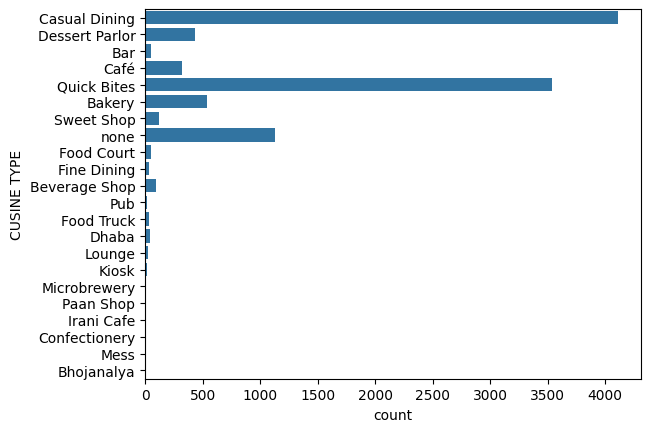

In [59]:
sns.countplot(zomato['CUSINE TYPE'])

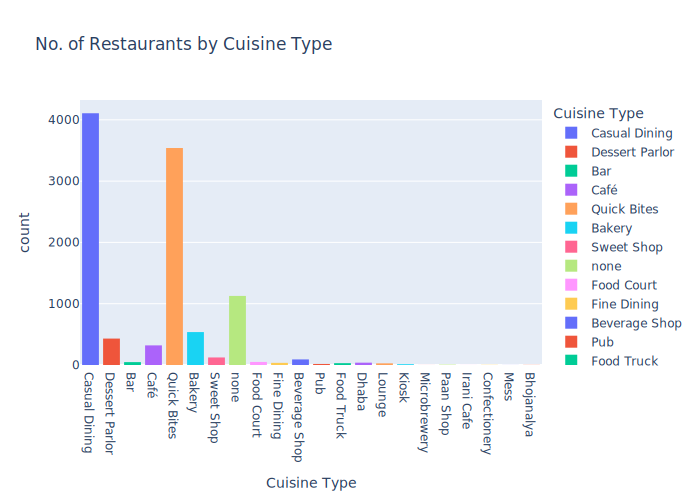

In [60]:
fig = px.histogram(zomato, x='CUSINE TYPE', color='CUSINE TYPE',title= 'No. of Restaurants by Cuisine Type',labels={'CUSINE TYPE':'Cuisine Type'})
fig.show()

In [61]:
#Q2) What are the percentage of restaurants by Rating Type in Mumbai?

In [62]:
zomato['RATING_TYPE'].value_counts().reset_index()

,RATING_TYPE,count
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


zomato['RATING_TYPE']: This selects the column RATING_TYPE from the zomato DataFrame.

.value_counts(): This calculates the frequency of each unique value in the RATING_TYPE column and returns a pandas Series, where the index represents the unique values and the values represent the counts.

.reset_index(): This converts the resulting Series from value_counts() into a DataFrame. The unique values become a column, and their corresponding counts become another column. It resets the index of the Series to a default integer index.

In [63]:
rating_type = zomato['RATING_TYPE'].value_counts().reset_index()
rating_type.rename(columns={'RATING_TYPE':'RATING TYPE', 'count':'COUNT OF RESTAURANTS'}, inplace=True)
rating_type

,RATING TYPE,COUNT OF RESTAURANTS
0,Average,4983
1,Good,4263
2,Very Good,1145
3,Excellent,96
4,Poor,56
5,Very Poor,4


<Axes: xlabel='RATING TYPE', ylabel='COUNT OF RESTAURANTS'>

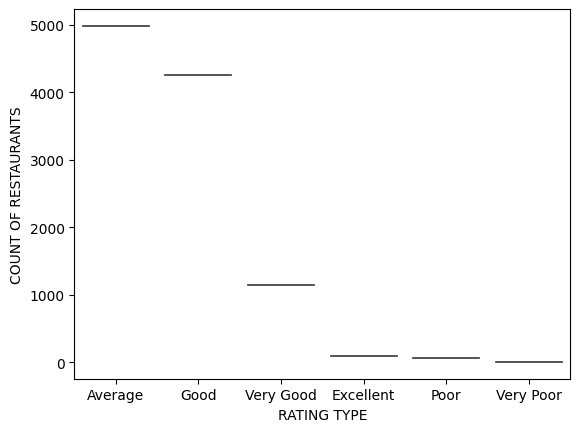

In [64]:
sns.violinplot(rating_type, x='RATING TYPE',y='COUNT OF RESTAURANTS')

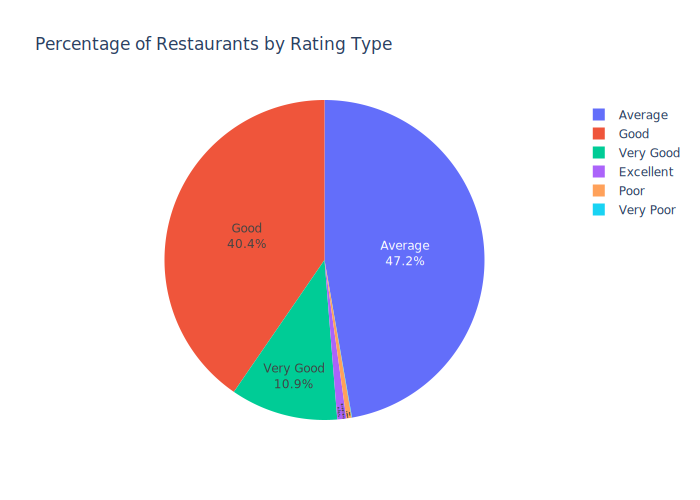

In [65]:
fig = px.pie(rating_type, names='RATING TYPE', values='COUNT OF RESTAURANTS', color='RATING TYPE',title='Percentage of Restaurants by Rating Type').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Key Components:
px.pie:

Creates a pie chart from the rating_type DataFrame.
Parameters:
names='RATING TYPE': Specifies the column for the categories (slices of the pie).
values='COUNT OF RESTAURANTS': Specifies the column for the numerical data (size of each slice).
color='RATING TYPE': Assigns distinct colors to each category based on the RATING TYPE.
title='Percentage of Restaurants by Rating Type':

Sets the title of the pie chart.
.update_traces:

Modifies the appearance of the pie chart.
textposition='inside': Positions the labels inside the pie slices.
textinfo='percent+label': Displays both the percentage and category label within each slice.
fig.show():

Displays the pie chart in an interactive Plotly window.

In [66]:
#Q3) Which are the Top 10 highest rated Seafood Restaurant in Mumbai?

In [67]:
seafood_df = zomato[zomato['CUSINE_CATEGORY'].str.contains('Seafood')]
seafood_df.sort_values(by='RATING',ascending=False).head(10)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
7104,Thangabali,1000,"Seafood,South Indian,Mangalorean,Andhra,Kerala",Khar,Bar,"12noon to 4pm,7pm to 3am",Excellent,4.7,564,Mon-Sun
76,Ceremonial Kitchen & Co,1000,"Seafood,Maharashtrian,North Indian,Chinese",Thane,Casual Dining,1130am to 1130pm,Excellent,4.6,350,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
9954,Pi Bar and Kitchen,1600,"Continental,European,Italian,Seafood,Pizza,Des...",Andheri,Bar,"12noon to 6pm,7pm to 12midnight",Excellent,4.5,2068,Mon-Sun
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
12433,Quarter Canteen,1100,"North Indian,Seafood,Chinese",Bandra,Casual Dining,"12noon to 330pm,7pm to 1am",Excellent,4.5,573,Mon-Sun
3380,Peco Peco,700,"Chinese,Seafood,Asian",Powai,none,"12noon to 330pm,7pm to 1230AM",Excellent,4.5,497,Mon-Sun
902,The Harbour Bay - SeaFood Kitchen & Bar,2400,"Seafood,Beverages",Bandra,Casual Dining,12noon to 1am,Excellent,4.5,100,Mon-Sun
915,Monis Bar and Restaurant,1000,"North Indian,Chinese,Continental,Seafood,Bever...",Thane,Casual Dining,"1130am to 330pm,6pm to 1130pm",Very Good,4.4,662,Mon-Sun
8890,Hardeep Punjab,1100,"North Indian,Chinese,Mughlai,Seafood",Sion,Casual Dining,11am to 1am,Very Good,4.4,871,Mon-Sun


# Step 1: Filter rows where 'CUSINE_CATEGORY' contains 'Seafood'
seafood_df = zomato[zomato['CUSINE_CATEGORY'].str.contains('Seafood')]

# Step 2: Sort the filtered DataFrame by the 'RATING' column in descending order
seafood_df = seafood_df.sort_values(by='RATING', ascending=False)

# Step 3: Display the top 10 rows
seafood_df.head(10)


In [68]:
#Q4) Which is the best Food Truck in Mumbai?

In [69]:
FoodTruck_df = zomato[zomato['CUSINE TYPE']== 'Food Truck']
FoodTruck_df.sort_values(by='RATING',ascending=False).head(2)

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
262,Dumpling Delights,200,Momos,Matunga,Food Truck,430pm to 930pm,Very Good,4.3,212,Mon-Sun
1017,Street Food Co.,250,"Fast Food,Chinese",Virar,Food Truck,6pm to 3am,Very Good,4.1,274,Mon-Sun


In [70]:
#Q5) Which places have the highest rated restaurant for each Cuisine Type in Mumbai?

In [71]:
highrated_df=zomato[zomato['RATING']>= 4.5]
highrated_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
7,Tanatan,1500,Modern Indian,Juhu,Casual Dining,12noon to 130am,Excellent,4.7,1842,Mon-Sun
9,Plum by Bent Chair,1800,Asian,Lower Parel,Casual Dining,12noon to 1am,Excellent,4.7,1876,Mon-Sun
10,Angrezi Dhaba,1500,"North Indian,Chinese,Thai,European",Dadar,Bar,12noon to 1am,Excellent,4.5,2092,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
14228,Zaika Crave - Club Aquaria,1300,"North Indian,Continental,Chinese,Desserts",Borivali,Casual Dining,"11am to 330pm,7pm to 1130pm",Excellent,4.5,1302,"Mon,Tue,Wed..."
14234,Cone Culture,250,European,Kharghar,Casual Dining,Closed,Excellent,4.6,492,"Mon,12noon to 11pm(Tue-Sun"
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
15051,Tick-eat,800,"North Indian,Italian,Chinese,Mexican,Lebanese",Mulund,Casual Dining,"1130am to 330pm,7pm to 1130pm",Excellent,4.5,754,Mon-Sun


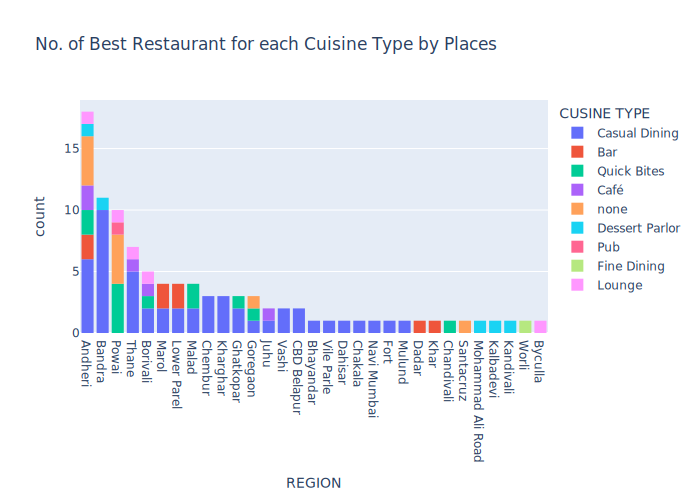

In [72]:
fig = px.histogram(highrated_df, x='REGION', color='CUSINE TYPE',title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

In [73]:
#Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Mumbai?

In [74]:
highrated_df['CUSINE TYPE'].value_counts()

CUSINE TYPE
Casual Dining     50
Quick Bites       12
none              10
Bar                8
Café               5
Dessert Parlor     5
Lounge             5
Pub                1
Fine Dining        1
Name: count, dtype: int64

In [75]:
list=[ 'Casual Dining', 'Quick Bites', 'none', 'Bar', 'Café', 'Dessert Parlor', 'Lounge', 'Pub', 'Fine Dining']
for cusine in list:
    value= highrated_df[highrated_df['CUSINE TYPE'] == cusine]['PRICE'].mean()
    print(cusine),print(value)

Casual Dining
1172.0
Quick Bites
579.1666666666666
none
520.0
Bar
1450.0
Café
920.0
Dessert Parlor
360.0
Lounge
1560.0
Pub
1400.0
Fine Dining
2000.0


In [76]:
highrated_price_df = highrated_df.groupby(by=['REGION','CUSINE TYPE'])['PRICE'].mean().reset_index()
highrated_price_df

,REGION,CUSINE TYPE,PRICE
0,Andheri,Bar,1600.000000
1,Andheri,Café,800.000000
2,Andheri,Casual Dining,1175.000000
3,Andheri,Dessert Parlor,300.000000
4,Andheri,Lounge,1700.000000
5,Andheri,Quick Bites,350.000000
6,Andheri,none,387.500000
7,Bandra,Casual Dining,1640.000000
8,Bandra,Dessert Parlor,350.000000
9,Bhayandar,Casual Dining,1000.000000


In [77]:
highrated_price_df.head()

,REGION,CUSINE TYPE,PRICE
0,Andheri,Bar,1600.0
1,Andheri,Café,800.0
2,Andheri,Casual Dining,1175.0
3,Andheri,Dessert Parlor,300.0
4,Andheri,Lounge,1700.0


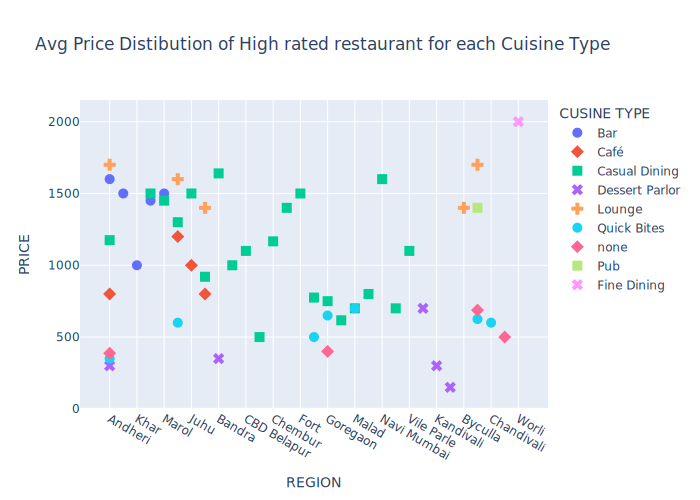

In [78]:
fig = px.scatter(highrated_price_df, x="REGION", y="PRICE", color="CUSINE TYPE", symbol="CUSINE TYPE",title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()


In [79]:
#Q7) Which areas have a large number of Chinese Restaurant Market?

In [80]:
chinese_df =zomato[zomato['CUSINE_CATEGORY'].str.contains('Chinese')]
chinese_df 

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café,12noon to 1am,Very Good,4.2,2042,Mon-Sun
6,Persian Darbar,1300,"Biryani,North Indian,Chinese,Mughlai",Marol,Casual Dining,10am to 3am,Excellent,4.5,3058,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15071,Lucknow Zaika,500,"North Indian,Chinese",Kurla,Quick Bites,12noon to 2am,Average,2.6,36,Mon-Sun
15072,Zuha's Kitchen,400,"Chinese,North Indian,Mughlai",Mumbai Central,Quick Bites,"12noon to 4pm,730pm to 430am",Average,3.3,13,Mon-Sun
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun


In [81]:
chinese_dfvalue= chinese_df['REGION'].value_counts().reset_index()
chinese_dfvalue

,REGION,count
0,Thane,371
1,Andheri,313
2,Mira Road,224
3,Malad,186
4,Goregaon,163
...,...,...
75,Churchgate,3
76,Breach Candy,3
77,Kemps Corner,2
78,Malabar Hill,1


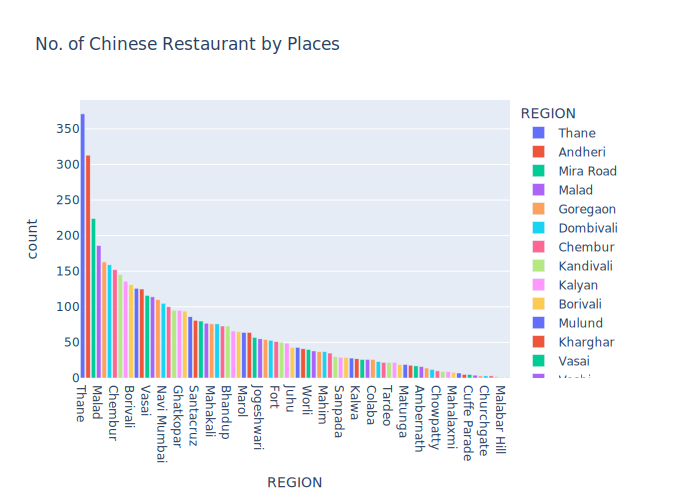

In [82]:
fig = px.bar(chinese_dfvalue, x='REGION', y='count',color ='REGION', title= 'No. of Chinese Restaurant by Places')
fig.show()

In [83]:
chinese_rest_df =chinese_df.groupby(by='REGION').agg({'NAME' : 'count', 'PRICE' : 'mean'}).rename(columns= {'NAME' : 'COUNT OF RESTAURANTS'})
chinese_rest_df

,COUNT OF RESTAURANTS,PRICE
REGION,,
Airoli,76,507.236842
Alibaug,3,750.000000
Ambernath,16,568.750000
Andheri,313,627.316294
Bandra,110,675.000000
...,...,...
Vikhroli,43,529.069767
Vile Parle,53,629.245283
Virar,95,500.000000


In [84]:
chinese_rest_df

,COUNT OF RESTAURANTS,PRICE
REGION,,
Airoli,76,507.236842
Alibaug,3,750.000000
Ambernath,16,568.750000
Andheri,313,627.316294
Bandra,110,675.000000
...,...,...
Vikhroli,43,529.069767
Vile Parle,53,629.245283
Virar,95,500.000000


chinese_rest_df = chinese_rest_df.drop(columns='level_0', errors='ignore')

# Reset the index
chinese_rest_df.reset_index(inplace=True)

In [86]:
chinese_rest_df = chinese_rest_df.sort_values('COUNT OF RESTAURANTS', ascending=False).reset_index()
chinese_rest_df.head()

,REGION,COUNT OF RESTAURANTS,PRICE
0,Thane,371,590.983827
1,Andheri,313,627.316294
2,Mira Road,224,553.348214
3,Malad,186,604.032258
4,Goregaon,163,548.773006


In [87]:
chinese_rest_df

,REGION,COUNT OF RESTAURANTS,PRICE
0,Thane,371,590.983827
1,Andheri,313,627.316294
2,Mira Road,224,553.348214
3,Malad,186,604.032258
4,Goregaon,163,548.773006
...,...,...,...
75,Alibaug,3,750.000000
76,Churchgate,3,400.000000
77,Kemps Corner,2,625.000000
78,Malabar Hill,1,550.000000


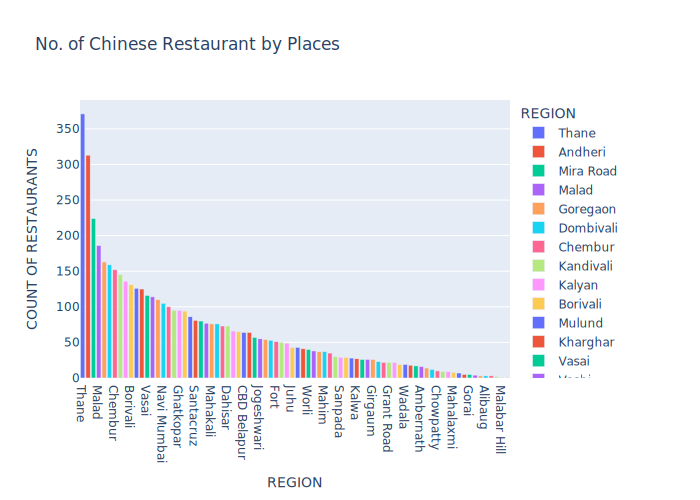

In [88]:
fig =px.bar(chinese_rest_df , x='REGION', y='COUNT OF RESTAURANTS',color ='REGION', title= 'No. of Chinese Restaurant by Places')
fig.show()

In [89]:
#Q8) Is there a relation between Price and Rating by each Cuisine Type?


In [90]:
zomato

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining,12noon to 130am,Excellent,4.9,3529,Mon-Sun
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor,2pm to 1am,Very Good,4.4,1723,Mon-Sun
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining,12noon to 1am,Very Good,4.2,337,Mon-Sun
3,Butterfly High,1000,Modern Indian,Bandra,Bar,12noon to 130am,Very Good,4.3,1200,Mon-Sun
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar,1130am to 1am,Very Good,4.4,5995,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining,"8am to 11pm,12midnight to 115am",Good,3.5,267,Mon-Sun
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites,11am to 230am,Good,3.7,64,Mon-Sun
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none,11am to 11pm,Average,3.4,99,"Mon,Tue,Wed,Thu,Sun,11am to ..."
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,9am to 1230AM,Good,3.5,29,Mon-Sun


In [91]:
price_rating_df = zomato.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()
price_rating_df

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


In [92]:
zomato.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean()

CUSINE TYPE  RATING
Bakery       2.7       400.000000
             2.8       285.714286
             2.9       328.571429
             3.0       300.000000
             3.1       369.117647
                          ...    
none         4.3       683.333333
             4.4       555.000000
             4.5       420.000000
             4.6       687.500000
             4.7       350.000000
Name: PRICE, Length: 283, dtype: float64

In [93]:
zomato.groupby(['CUSINE TYPE', 'RATING'])['PRICE'].mean().reset_index()

,CUSINE TYPE,RATING,PRICE
0,Bakery,2.7,400.000000
1,Bakery,2.8,285.714286
2,Bakery,2.9,328.571429
3,Bakery,3.0,300.000000
4,Bakery,3.1,369.117647
...,...,...,...
278,none,4.3,683.333333
279,none,4.4,555.000000
280,none,4.5,420.000000
281,none,4.6,687.500000


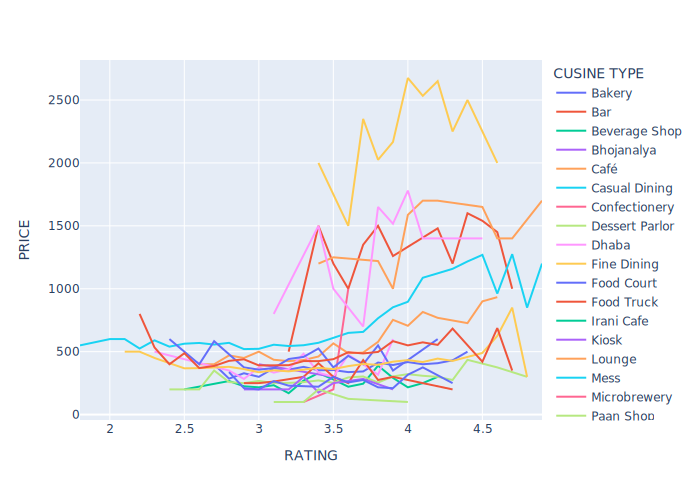

In [94]:
fig = px.line(price_rating_df, y="PRICE", x="RATING",color='CUSINE TYPE')
fig.show()

In [95]:
#Q9) Is there a relation between Region and Price?


In [96]:
region_price_df = zomato.groupby(['REGION'])['PRICE'].mean().reset_index()
region_price_df

,REGION,PRICE
0,Airoli,452.287582
1,Alibaug,665.000000
2,Ambernath,514.000000
3,Andheri,562.506596
4,Bandra,724.945946
...,...,...
75,Vikhroli,480.434783
76,Vile Parle,464.457831
77,Virar,452.027027
78,Wadala,427.500000


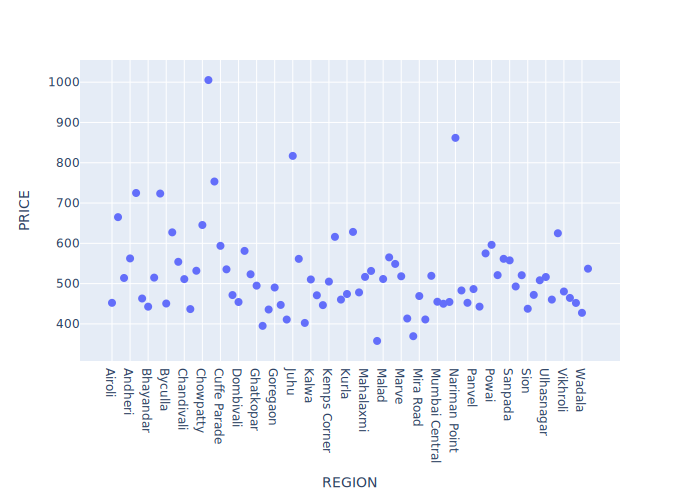

In [97]:

fig = px.scatter(region_price_df, x="REGION", y="PRICE").update_traces(marker_size=8)
fig.show()

Q10) Find the list of Affordable Restaurants?
The criteria for Affordable Restaurants would be:-
1) Low Price 2) High Rated
First step will be to find the restaurants with average cost 1/4th the average cost of most expensive restaurant in our dataframe.
Let me explain:-The most expensive restaurant has an average meal cost= 6000. We'll try to stay economical and only pick the
restaurants that are 1/4th of 6000

In [98]:
max_price = zomato['PRICE'].max()
one_fourth_price = max_price/4
one_fourth_price

np.float64(1250.0)

In [99]:
# Finding list of restaurants that have price less than and equal to 1/4th of the max price i.e Finding Cheap Restauran
aff_rest_df1 = zomato[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
aff_rest_df1=aff_rest_df1[(aff_rest_df1['PRICE'] <= 1250) & (aff_rest_df1['RATING']>=4.5)]
aff_rest_df1.sort_values(by= 'PRICE', inplace=True)
aff_rest_df1

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites,4.5
807,Moussestruck,200,Desserts,Andheri,none,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
3924,Smiley Pops,300,"Desserts,Ice Cream,Beverages,Sandwich",Andheri,Dessert Parlor,4.6
...,...,...,...,...,...,...
26,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining,4.5
357,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining,4.5
196,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining,4.7
50,Spice Republic,1200,"Cafe,Continental,Mediterranean,Mexican,Italian...",Borivali,Café,4.6


In [100]:
#CREATING A VARIABLE which contains a table FROM ZOMATO DATAFRAME FOR ANALYSIS
aff_rest_df = zomato[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE']]
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor
2,Chin Chin Chu,1800,"Asian,Chinese",Juhu,Casual Dining
3,Butterfly High,1000,Modern Indian,Bandra,Bar
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar
...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor


In [101]:
[aff_rest_df['PRICE'] <= 1250]

[0         True
 1         True
 2        False
 3         True
 4         True
          ...  
 15075     True
 15076     True
 15077     True
 15078     True
 15079     True
 Name: PRICE, Length: 10547, dtype: bool]

In [102]:
aff_rest_df[aff_rest_df['PRICE'] <= 1250]

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor
3,Butterfly High,1000,Modern Indian,Bandra,Bar
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café
...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor


In [103]:
# New dataset with restautants price less that 1250rs has been created
aff_rest_df = aff_rest_df[aff_rest_df['PRICE'] <= 1250]
aff_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Hitchki,1200,"Modern Indian,North Indian,Chinese,Momos,Birya...",Bandra,Casual Dining
1,Baba Falooda,400,"Desserts,Ice Cream,Beverages",Mahim,Dessert Parlor
3,Butterfly High,1000,Modern Indian,Bandra,Bar
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar
5,Flea Bazaar Café,800,"American,Asian,Street Food,North Indian,Luckno...",Lower Parel,Café
...,...,...,...,...,...
15075,Tirupati Balaji,500,"Chinese,Fast Food,North Indian",Andheri,Casual Dining
15076,Hari Om Snack Bar,350,"Fast Food,South Indian,Chinese",Kandivali,Quick Bites
15077,PitaBurg,400,"Fast Food,Lebanese",Lower Parel,none
15078,Uncha Otlawala,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor


In [104]:
#Sorted the above dataset in ascending order using the price column
aff_rest_df.sort_values(by='PRICE', inplace=True, ascending= True)
aff_rest_df

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\457615519.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
6137,Sanjog Wine N Dine,5,"North Indian,Chinese",Thane,Casual Dining
2925,Jab We Eat,50,"South Indian,North Indian,Maharashtrian,Fast Food",Girgaum,none
9598,Ho5 Store,50,Fast Food,Matunga,none
10996,Pandurang Wada Pav And Sandwich Centre,100,Street Food,Goregaon,Quick Bites
3328,Gurukrupa Sandwich And Frankie Corner,100,"Rolls,Fast Food",Sion,none
...,...,...,...,...,...
4,BKC DIVE,1200,"North Indian,Chinese,Continental",Bandra,Bar
17,Ustaadi,1200,"Asian,Biryani,Chinese,North Indian,Mughlai,Mid...",Mumbai Central,Casual Dining
7301,SamBar Pub & Kitchen,1250,"Finger Food,South Indian,North Indian",Khar,Pub
6045,Fabelle at The Chocolate Boutique - ITC Grand ...,1250,Desserts,Parel,Dessert Parlor


In [105]:

# Finding the highest rated list of restaurants
highestrate_rest_df = zomato[['NAME', 'PRICE', 'CUSINE_CATEGORY', 'REGION', 'CUSINE TYPE','RATING']]
highestrate_rest_df = highestrate_rest_df[highestrate_rest_df['RATING'] >= 4.5]
highestrate_rest_df.sort_values(by='PRICE', inplace=True)
highestrate_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,RATING
1502,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor,4.6
807,Moussestruck,200,Desserts,Andheri,none,4.5
763,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites,4.5
14234,Cone Culture,250,European,Kharghar,Casual Dining,4.6
725,Belo Pops,300,"Ice Cream,Desserts,Beverages",Andheri,none,4.5
...,...,...,...,...,...,...
8887,Drifters Tap Station,2000,"North Indian,Continental,European,American",Bandra,Casual Dining,4.5
1786,Global Fusion,2000,"Chinese,Japanese,Asian,North Indian",Worli,Fine Dining,4.6
5335,Mia Cucina,2000,Italian,Bandra,Casual Dining,4.5
12625,House of Mandarin,2100,"Chinese,Sushi,Asian",Bandra,Casual Dining,4.5


In [106]:
#Now, we'll merge the aff_rest_df with highrate_rest_df to obtain the intersection i.e the list of Affordable Restaurants !!
highrate_aff_df = pd.merge(aff_rest_df, highestrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY','REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)

#pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False)
left: The first DataFrame to merge.
right: The second DataFrame to merge.
how: Specifies the type of merge:
'inner': Only rows with keys that appear in both DataFrames are included (default).
'outer': Includes all rows from both DataFrames, with NaN where a row from one DataFrame does not have a match in the other.
'left': All rows from the left DataFrame and matching rows from the right DataFrame.
'right': All rows from the right DataFrame and matching rows from the left DataFrame.
on: The column name(s) on which to merge. If not specified, it will use the column names that exist in both DataFrames.
left_on / right_on: Specifies columns in the left and right DataFrames on which to merge, respectively (if they differ between the two DataFrames).
left_index / right_index: If True, uses the index from the left/right DataFrame as the merge key instead of columns.

In [107]:

# Affordable Restaurants with low price and high rating 
highrate_aff_df


,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200,Desserts,Andheri,none
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
...,...,...,...,...,...
60,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining
61,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri,Casual Dining
62,The Joker Bistro,1200,"North Indian,Chinese,Continental",CBD Belapur,Casual Dining
63,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining


#What Happens Here:
aff_rest_df and highestrate_rest_df are the two DataFrames you're merging.
how='inner' means you're performing an inner join, so only rows with matching NAME and REGION values in both DataFrames will be included.
on=['NAME', 'REGION'] specifies that the merge should be performed on the columns NAME and REGION. Only the rows where both these columns match in both DataFrames will be retained.
For example, if aff_rest_df has data about restaurants in different regions, and highestrate_rest_df has a higher rating for some of the same restaurants in those regions, only the restaurants that appear in both DataFrames with the same NAME and REGION will be included in the result.

In [108]:
highrate_aff_df = pd.merge(aff_rest_df, highestrate_rest_df, how='inner', on=['NAME', 'REGION'])
highrate_aff_df = highrate_aff_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
highrate_aff_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY','REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
highrate_aff_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Cake Centre-The Dessert Maker,150,Desserts,Mohammad Ali Road,Dessert Parlor
1,Curry And Combos Twist,200,"North Indian,Chinese",Andheri,Quick Bites
2,Moussestruck,200,Desserts,Andheri,none
3,Cone Culture,250,European,Kharghar,Casual Dining
4,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
...,...,...,...,...,...
60,Culinary Tales,1200,"Chinese,European,Continental,Salad,Italian,Pizza",Andheri,Casual Dining
61,Wild Dining Restaurant,1200,"North Indian,Continental,Mexican,Chinese",Andheri,Casual Dining
62,The Joker Bistro,1200,"North Indian,Chinese,Continental",CBD Belapur,Casual Dining
63,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining


#Q10) Find the list of most Reliable Restaurants?
#The criteria for most Reliable Restaurants would be:-
1) Low Price 2) High Rated 3) Large No. of Votes
First step will be to find the restaurants with Votes greater than Mean of Votes 

In [109]:
zomato['VOTES'].mean()

np.float64(177.2656679624538)

In [110]:
zomato['VOTES']>zomato['VOTES'].mean()

0         True
1         True
2         True
3         True
4         True
         ...  
15075     True
15076    False
15077    False
15078    False
15079    False
Name: VOTES, Length: 10547, dtype: bool

In [111]:
mean_rest_df=zomato[zomato['VOTES']>zomato['VOTES'].mean()]
mean_rest_df.sort_values(by='VOTES', inplace=True)
mean_rest_df

C:\Users\my pc\AppData\Local\Temp\ipykernel_3052\2871399190.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
99,Appetite - Resto Bar,700,"North Indian,Chinese",Powai,Casual Dining,"12noon to 4pm,630pm to 130am",Good,3.7,178,Mon-Sun
12267,Buddha Bowl,1000,"Asian,Healthy Food",Bandra,none,"12noon to 330pm,7pm to 1130pm",Very Good,4.1,178,"Mon-Thu,12noon..."
2193,Mumbai Darbar,850,"North Indian,Chinese,Seafood",Lower Parel,Casual Dining,11am to 12midnight,Good,3.6,178,Mon-Sun
11211,Soul Curry,800,"Chinese,North Indian,Malwani,Mughlai,Biryani",Bhandup,Casual Dining,11am to 1230AM,Good,3.7,178,Mon-Sun
2392,Jain Sweet & Farsan House,200,"Street Food,Beverages,Fast Food,Mithai",Goregaon,Quick Bites,8am to 930pm,Average,3.4,178,Mon-Sun
...,...,...,...,...,...,...,...,...,...,...
8539,Leopold Cafe & Bar,1600,"American,Chinese,Mughlai,Italian",Colaba,Casual Dining,730am to 12midnight,Good,3.9,7327,Mon-Sun
1251,Joey's Pizza,800,Pizza,Malad,Quick Bites,11am to 12midnight,Excellent,4.6,7350,Mon-Sun
5337,Chili's American Grill & Bar,1400,"American,Mexican,Burger,Tex-Mex",Powai,Casual Dining,12noon to 130am,Very Good,4.3,7377,Mon-Sun
3751,Prithvi Cafe,700,"Cafe,Fast Food",Juhu,Café,1030am to 1030pm,Very Good,4.4,8000,Mon-Sun


In [112]:
# COMBINE MEAN REST AND HIGHRATE_AFF TABLE
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)


In [113]:
# COMBINE MEAN REST AND HIGHRATE_AFF TABLE
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df 

,NAME,PRICE_x,CUSINE_CATEGORY_x,REGION,CUSINE TYPE_x,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN,PRICE_y,CUSINE_CATEGORY_y,CUSINE TYPE_y
0,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun,800,"Maharashtrian,Konkan,Seafood",Casual Dining
1,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none,9am to 11pm,Excellent,4.5,182,Mon-Sun,500,"Continental,Healthy Food,Salad,Beverages,Desse...",none
2,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun,300,"Desserts,Ice Cream",Dessert Parlor
3,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining,"1130am to 4pm,7pm to 12midnight",Excellent,4.5,190,Mon-Sun,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Casual Dining
4,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun,600,"Maharashtrian,Malwani,Konkan,Seafood",Casual Dining
5,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining,Closed,Excellent,4.6,223,"Mon,Thu,Fri,1230pm to 1130pm(Tue...",600,"Continental,Fast Food,Italian,Desserts",Casual Dining
6,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none,"12noon to 330pm,7pm to 2am",Excellent,4.7,227,Mon-Sun,350,"North Indian,Biryani,Rolls",none
7,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining,12noon to 12midnight,Excellent,4.6,231,Mon-Sun,1000,"Fast Food,Bar Food",Casual Dining
8,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining,12noon to 1230AM,Excellent,4.5,271,Mon-Sun,1200,"North Indian,Finger Food,American,Mexican,Chinese",Casual Dining
9,Maezo,1000,Modern Indian,Thane,Casual Dining,12noon to 1am,Excellent,4.6,306,Mon-Sun,1000,Modern Indian,Casual Dining


In [114]:
# COMBINE MEAN REST AND HIGHRATE_AFF TABLE
reliable_rest_df = pd.merge(mean_rest_df, highrate_aff_df, how='inner', on=['NAME', 'REGION'])
reliable_rest_df = reliable_rest_df[['NAME', 'PRICE_x', 'CUSINE_CATEGORY_x', 'REGION', 'CUSINE TYPE_x']]
reliable_rest_df.rename(columns={'NAME':'NAME', 'PRICE_x':'PRICE', 'CUSINE_CATEGORY_x':'CUSINE_CATEGORY',
 'REGION':'REGION', 'CUSINE TYPE_x':'CUSINE TYPE'},inplace=True)
reliable_rest_df

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE
0,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining
1,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none
2,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor
3,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining
4,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining
5,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining
6,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none
7,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining
8,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining
9,Maezo,1000,Modern Indian,Thane,Casual Dining


In [115]:
#other method
reliable_rest_df1= mean_rest_df[(mean_rest_df['PRICE']<=1250)&(mean_rest_df['RATING']>=4.5)]

In [116]:
reliable_rest_df1

,NAME,PRICE,CUSINE_CATEGORY,REGION,CUSINE TYPE,TIMING,RATING_TYPE,RATING,VOTES,DAYS_OPEN
884,Rajmanya- Seafood family restaurant,800,"Maharashtrian,Konkan,Seafood",Vashi,Casual Dining,11am to 11pm,Excellent,4.5,178,Mon-Sun
466,Fresh Food Co.,500,"Continental,Healthy Food,Salad,Beverages,Desse...",Santacruz,none,9am to 11pm,Excellent,4.5,182,Mon-Sun
15007,Dessertino,300,"Desserts,Ice Cream",Kandivali,Dessert Parlor,11am to 12midnight,Excellent,4.8,184,Mon-Sun
357,Invento,1200,"Chinese,Fast Food,North Indian,Italian,Mexican",Lower Parel,Casual Dining,"1130am to 4pm,7pm to 12midnight",Excellent,4.5,190,Mon-Sun
13685,Maharashtra Lunch Home,600,"Maharashtrian,Malwani,Konkan,Seafood",Kharghar,Casual Dining,"11am to 345pm,7pm to 1145pm",Excellent,4.6,209,Mon-Sun
1847,Regano's,600,"Continental,Fast Food,Italian,Desserts",Malad,Casual Dining,Closed,Excellent,4.6,223,"Mon,Thu,Fri,1230pm to 1130pm(Tue..."
901,Big Bang Cuurry,350,"North Indian,Biryani,Rolls",Andheri,none,"12noon to 330pm,7pm to 2am",Excellent,4.7,227,Mon-Sun
12094,Sandy's Den,1000,"Fast Food,Bar Food",Chembur,Casual Dining,12noon to 12midnight,Excellent,4.6,231,Mon-Sun
26,Angrezi Patiyalaa,1200,"North Indian,Finger Food,American,Mexican,Chinese",Andheri,Casual Dining,12noon to 1230AM,Excellent,4.5,271,Mon-Sun
724,Maezo,1000,Modern Indian,Thane,Casual Dining,12noon to 1am,Excellent,4.6,306,Mon-Sun
